In [1]:
# ======================= Importing libraries ===================================

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ====================== Reading data from Titanic Dataset =======================
data=pd.read_csv('C:/Users/faiza/Desktop/titanic/train.csv')

In [2]:
#print dataset

print('dataset:' +str(len(data.index)))
data.head()

dataset:891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:

print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# print passenger age data

ag=data[pd.notnull(data['Age'])]
print('passenger age data:' +str(len(ag.index))+ '\n')


passenger age data:714



In [5]:
# print passenger embark data

embark=ag[pd.notnull(data['Embarked'])]
print('passenger embark data:' +str(len(embark.index)))

passenger embark data:712


C:\Users\faiza\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# print  Mean data by Gender
gd=embark.groupby('Sex',as_index=False)
gd_mean=gd.mean()

print('survival  data:' +str(embark['Survived'].mean()))

print('\nMean data by Gender')
print(gd_mean[['Sex','Survived','Age','Pclass','SibSp','Parch','Fare']])


survival  data:0.4044943820224719

Mean data by Gender
      Sex  Survived        Age    Pclass     SibSp     Parch       Fare
0  female  0.752896  27.745174  2.073359  0.644788  0.714286  47.332433
1    male  0.205298  30.726645  2.335541  0.439294  0.271523  27.268836


In [8]:
# print total Passenger male and female
total=gd['PassengerId'].count()
print(total)
total.columns=['Sex','Total']
gd_list=total['Sex']
del total['Sex']
print( total)
print (gd)

      Sex  PassengerId
0  female          259
1    male          453
   Total
0    259
1    453


In [10]:
# print group data survived
gd_srv=gd['Survived'].sum()
print(gd_srv)
del gd_srv['Sex']
print(gd_srv)

com =total.add(gd_srv,fill_value = 0)

print(com)

      Sex  Survived
0  female       195
1    male        93
   Survived
0       195
1        93
   Survived  Total
0     195.0  259.0
1      93.0  453.0


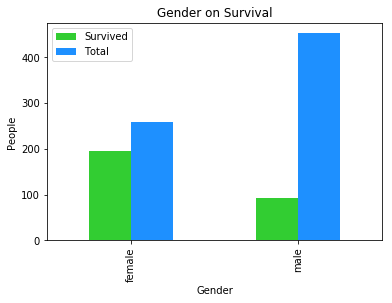

In [22]:
# graph plotinggender on survival  :-

com.plot.bar(color=['limegreen','dodgerblue'])
plt.title('Gender on Survival')
plt.xlabel('Gender')

plt.ylabel('People')
plt.xticks(range(len(gd_list)), gd_list)

srv_gd_list=[com.loc[0]['Survived'],com.loc[1]['Survived']]

total_gd_list=[com.loc[0]['Total'],com.loc[1]['Total']]



In [23]:
#print children and adult list data
ch=embark[embark['Age'] <= 18]
ad=embark[embark['Age']>18]
    
ch_count =ch['PassengerId'].count()
ad_count =ad['PassengerId'].count()
    
srv_ch_count =ch['Survived'].sum()
srv_ad_count =ad['Survived'].sum()
    
ch_list =[srv_ch_count,ch_count]
ad_list =[srv_ad_count,ad_count]
total_list =[ch_count,ad_count]
print(ch_list)
print(ad_list)
print(total_list)


[70, 139]
[218, 573]
[139, 573]


In [24]:
# print children and adult survived

srv_list=[srv_ch_count,srv_ad_count]
cv=pd.DataFrame([ch_list,ad_list],columns=['Survived','Total'],index =['Children','Adult'])
print(cv)

          Survived  Total
Children        70    139
Adult          218    573


Text(0.5, 1.0, 'Children and Adults')

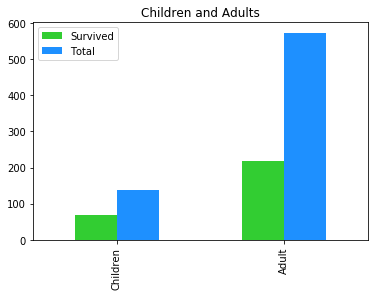

In [25]:
#graph ploting children and adults
cv.plot.bar(color=['limegreen','dodgerblue'])
plt.title('Children and Adults')

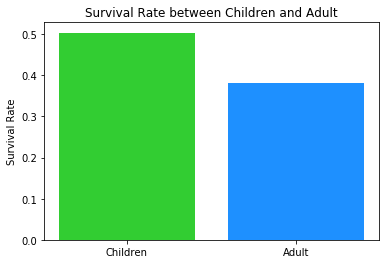

In [26]:
# graph ploting survival rate between children and adult
srv_rate=[ch.mean()['Survived'],ad.mean()['Survived']]
plt.bar(range(len(srv_rate)),srv_rate,align='center',color=['limegreen','dodgerblue'])
plt.title('Survival Rate between Children and Adult')
plt.ylabel('Survival Rate')
plt.xticks(range(len(srv_rate)),['Children','Adult'])
plt.show()

In [28]:
#define function to create value labels on plots

def create_value_labels(list_data,decimals,x_adjust,y_adjust):
    for x,y in enumerate(list_data):
        plt.text(x +x_adjust,y +y_adjust,round(list_data[x],decimals),color='w',fontweight='bold')
        
        create_value_labels(srv_gd_list, 1, -0.2, -50)
        create_value_labels(total_gd_list, 1, 0.05, -50)
        plt.show()

In [32]:
print(embark)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
18            19         0       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
27            28         0       1   
30            31         0       1   
33          

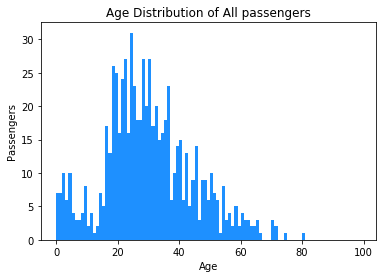

In [33]:
#histogram ploting:-
embark['Age'].plot.hist(bins=range(100),color='dodgerblue')
plt.title('Age Distribution of All passengers')
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.show()

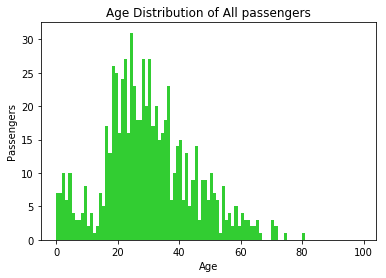

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [35]:
#ploting age distribution of all passangers:-      
embark['Age'].plot.hist(bins=range(100),color='limegreen')
plt.title('Age Distribution of All passengers')
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.show()
srv_stats=embark['Age'].describe()
print(srv_stats)